线性回归
==============
让我们从经典的线性回归（Linear Regression）模型开始这份教程。在这一章里，你将使用真实的数据集建立起一个房价预测模型，并且了解到机器学习中的若干重要概念。

1 背景原理
----------
线性回归假设各个变量之间是线性变化的：

$$y = WX + b = \Sigma w_{i}x_{i}+b$$

$x_i$是特征，$w_i$是每个特征的权重。初看起来，这个假设实在过于简单了，变量间的真实关系很难是线性的。但由于线性回归模型有形式简单和易于建模分析的优点，它在实际问题中得到了大量的应用。


2 数据集介绍
-----------
在波士顿房价数据集中，和房屋相关的值共有14个：前13个用来描述房屋相关的各种信息，即模型中的$x_i$；最后一个值为我们要预测的该类房屋价格的中位数，即模型中的y。这份数据集共506行，每行包含了波士顿郊区的一类房屋的相关信息及该类房屋价格的中位数。其各维属性的意义如下：


| 属性名 | 解释 | 类型 |
| ------| ------ | ------ |
| CRIM | 该镇的人均犯罪率 | 连续值 |
| ZN | 占地面积超过25,000平方呎的住宅用地比例 | 连续值 |
| INDUS | 非零售商业用地比例 | 连续值 |
| CHAS | 是否邻近 Charles River  | 离散值，1=邻近；0=不邻近 |
| NOX | 一氧化氮浓度 | 连续值 |
| RM | 每栋房屋的平均客房数 | 连续值 |
| AGE | 1940年之前建成的自用单位比例 | 连续值 |
| DIS | 到波士顿5个就业中心的加权距离 | 连续值 |
| RAD | 到径向公路的可达性指数 | 连续值 |
| TAX | 全值财产税率 | 连续值 |
| PTRATIO | 学生与教师的比例 | 连续值 |
| B | 1000(BK - 0.63)^2，其中BK为黑人占比 | 连续值 |
| LSTAT | 低收入人群占比 | 连续值 |
| MEDV | 同类房屋价格的中位数 | 连续值 |

In [2]:
import sys
sys.path.append('../../')

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import kitorch as kt
from kitorch.dataset import uci_housing
from kitorch.dataset.common import batch
from kitorch import optim,nn,functional as F  

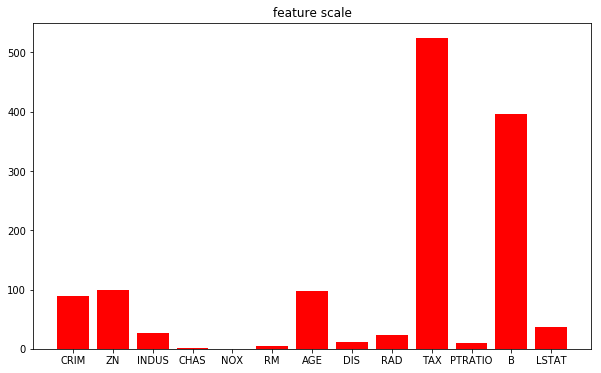

In [4]:
#1 获取数据
train_data, test_data = uci_housing.fetch()

In [5]:
#2 建立模型
class LinearNet(nn.Module):
    def __init__(self):
        super(LinearNet,self).__init__()
        self.fc = nn.Linear(13,1)
    
    def forward(self,x):
        return self.fc(x)

In [6]:
#3 定义目标函数
criterion = F.mse_loss

In [7]:
model = LinearNet()
lr = 0.5
#4 定义一个优化器
optimizer = optim.Adam(model.parameters(),lr =lr)

In [8]:
epochs = 20

for epoch in range(epochs):
    total_loss = 0
    for data in batch(train_data,20):
        optimizer.zero_grad()
        x = kt.from_numpy(data[:,0:13])
        y = kt.from_numpy(np.expand_dims(data[:,-1],1))
                             
        y_hat = model(x)
        loss = criterion(y_hat,y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
    if epoch % 5 == 0:
        print("epoch: %s, loss: %s"%(epoch,total_loss))

epoch: 0, loss: 7525.053838277247
epoch: 5, loss: 539.1858180431633
epoch: 10, loss: 486.44588404066326
epoch: 15, loss: 479.740764857011


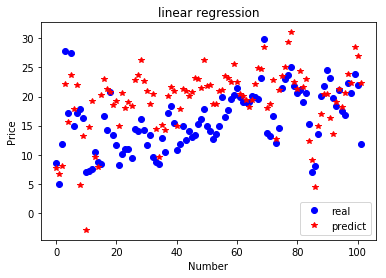

In [9]:
# 预测结果对比
x = kt.from_numpy(test_data[:,0:13])
y = test_data[:,-1]
with kt.no_grad():
    y_hat = model(x)

plt.title("linear regression") 
plt.xlabel("Number") 
plt.ylabel("Price") 
y_real = plt.plot(y,"ob")
y_pred = plt.plot(y_hat.numpy(),'*r')
plt.legend(labels = ['real', 'predict'], loc = 'best')
plt.show()